### <span style='color:Green'> Imam Abdullah Khan</span><br><span style='color:Blue'>Domain: Data Science and Business Analytics</span>
#### Task 3: Exploratory Data Analysis - Retail<br>Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("SamplesuperStore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
print(df.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Here we can see that 'Profit' is Positively correlated with Sales.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

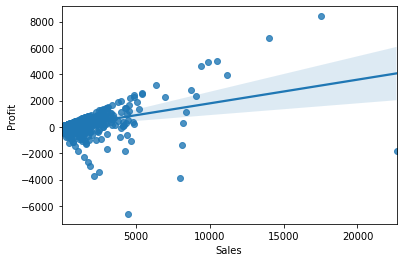

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="Sales", y="Profit", data=df)


### Categorical Variables

In [9]:
Top_Sales_State = df.groupby("State").Sales.sum().nlargest(n=10)
Top_Profit_State = df.groupby("State").Profit.sum().nlargest(n=10)

Text(0.5, 1.0, 'Top 10 State Sales')

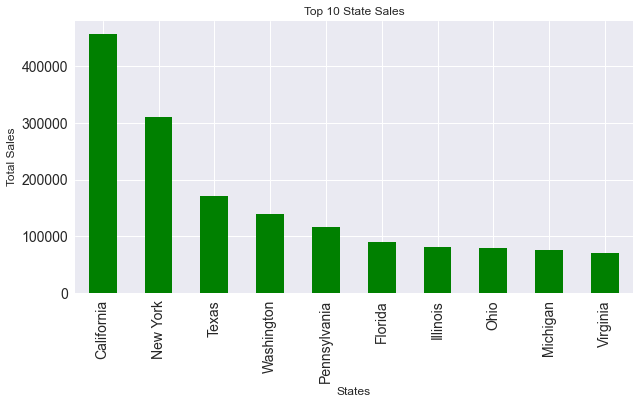

In [24]:
plt.style.use("seaborn")
Top_Sales_State.plot(kind ='bar',figsize=(10,5), color = 'green', fontsize = 14)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Total Sales", fontsize = 12)
plt.title("Top 10 State Sales")

Text(0.5, 1.0, 'Top 10 State Profit')

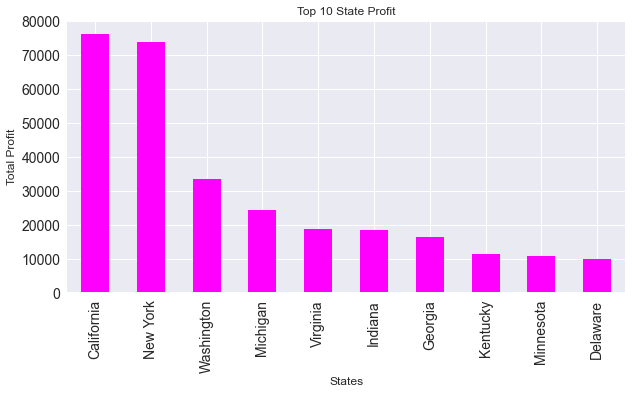

In [11]:
plt.style.use("seaborn")
Top_Profit_State.plot(kind ='bar',figsize=(10,5), color = 'magenta', fontsize = 14)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Total Profit", fontsize = 12)
plt.title("Top 10 State Profit")

California is Top is making Sales and Profit, also New York is making more profit then sales

In [27]:
df.describe(include=['object'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [13]:
def sales_profit(x):
    sales_profit = df.groupby([x])[['Profit', 'Sales']].sum()
    sales_profit.plot.bar(rot=0,figsize=(15,8))
    plt.title(f'Sales per {x}', fontsize = 25)
    plt.show(block=True)

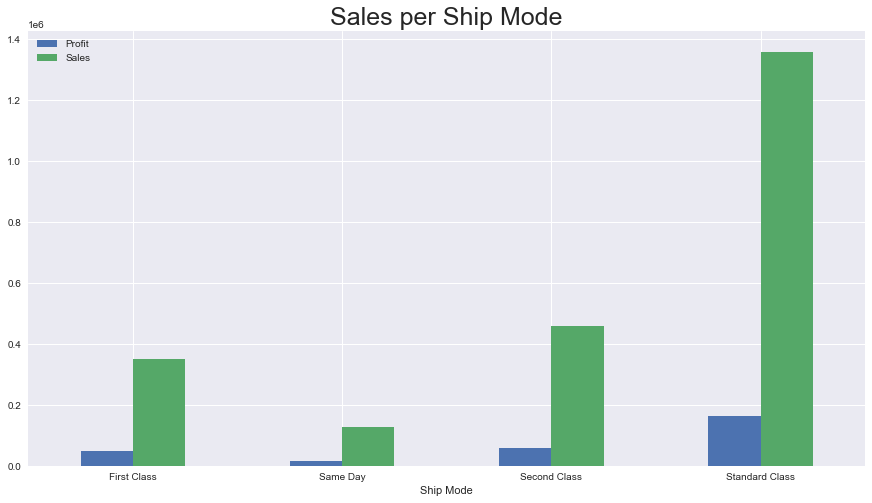

In [14]:
sales_profit("Ship Mode")

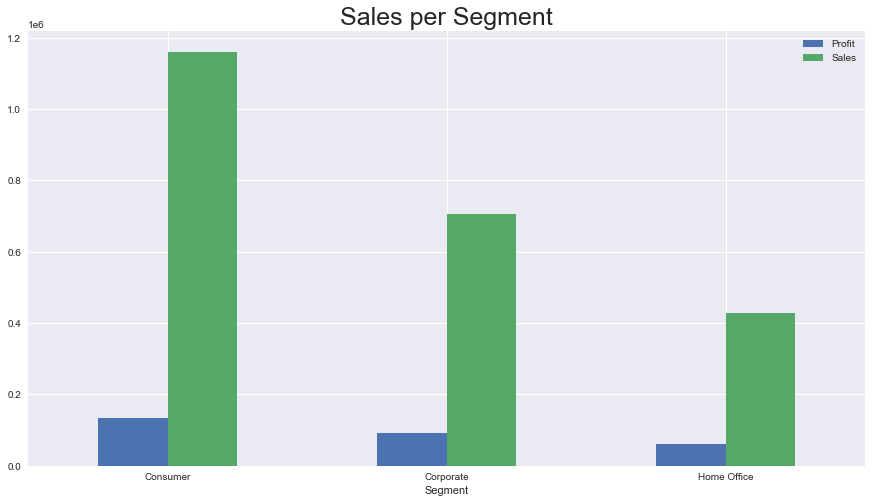

In [15]:
sales_profit('Segment')

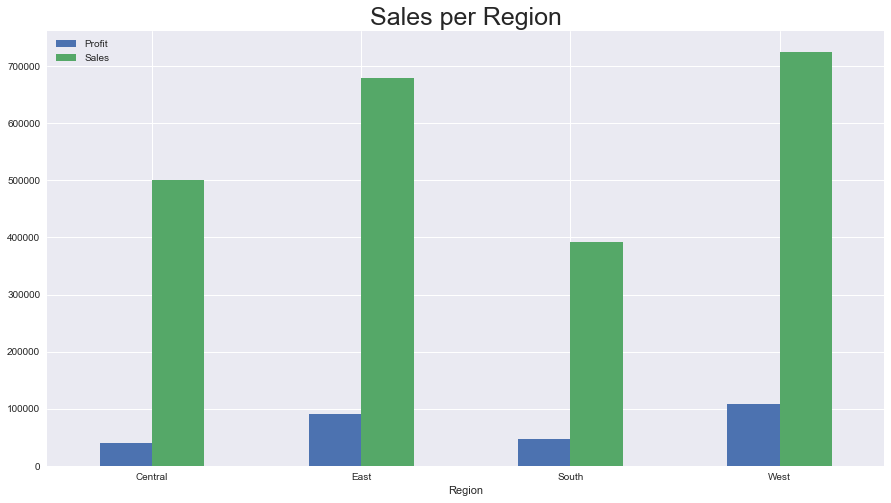

In [16]:
sales_profit('Region')

Sales and Profit is highest in West followed by East region.

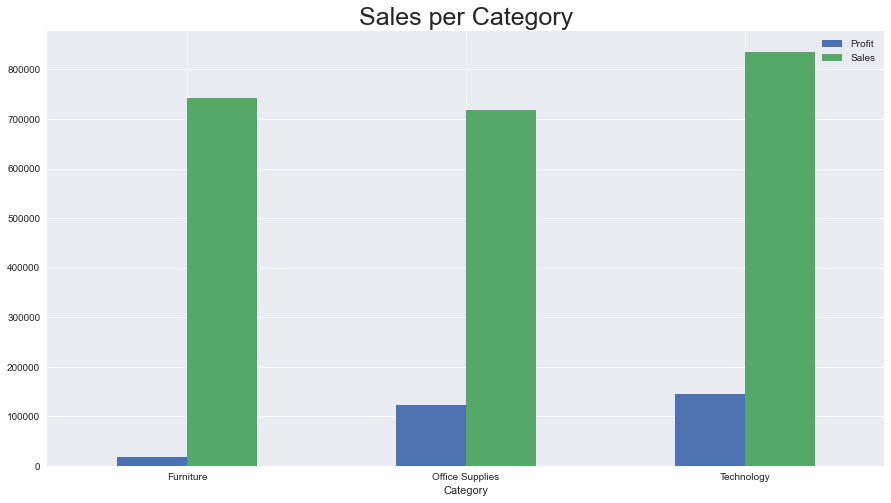

In [17]:
sales_profit('Category')

Technology has highest sales

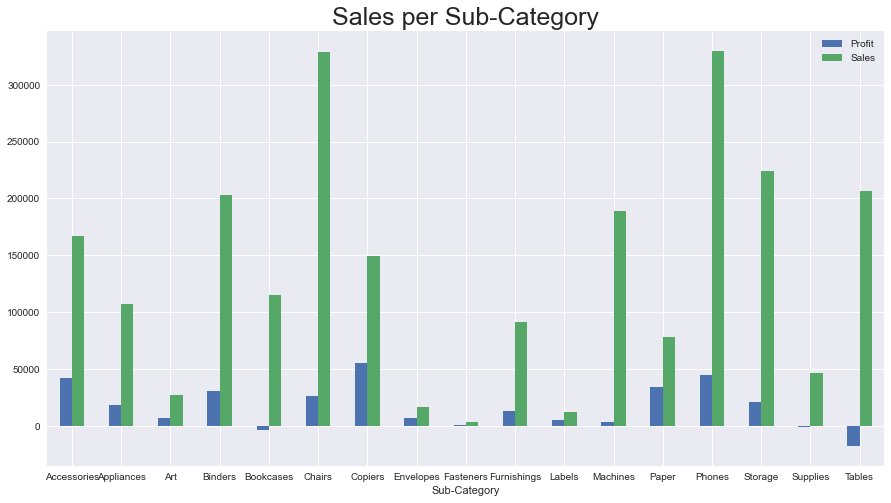

In [18]:
sales_profit("Sub-Category")

Text(0.5, 1.0, 'Sales per Category and Sub-Category')

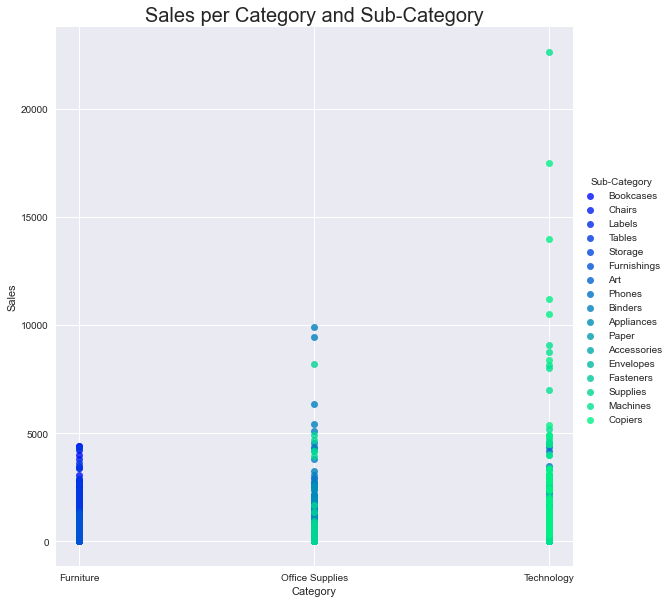

In [19]:
sns.lmplot(x="Category", y = "Sales", data = df, fit_reg = False, hue = "Sub-Category", legend = True, palette = "winter", height = 8)
plt.title("Sales per Category and Sub-Category", fontsize = 20)

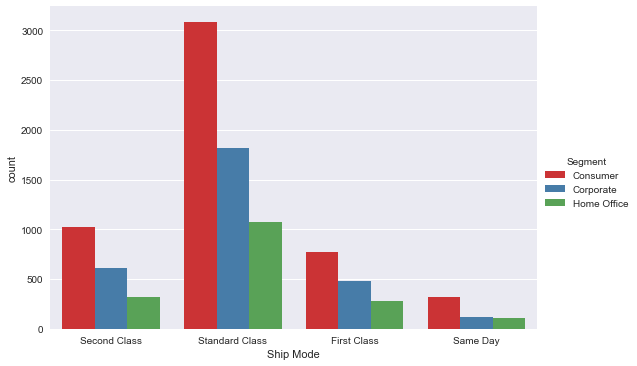

In [20]:
sns.catplot(x="Ship Mode", hue = "Segment",data = df, kind = "count", aspect = 1.5, palette = "Set1")

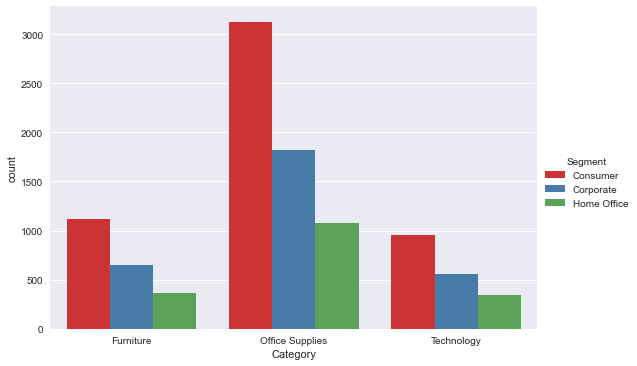

In [21]:
sns.catplot(x="Category", hue = "Segment",data = df, kind = "count", aspect = 1.5, palette = "Set1")

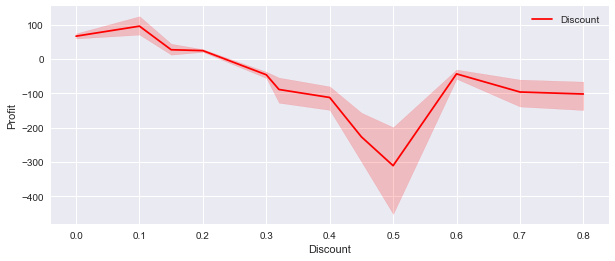

In [22]:
plt.figure(figsize=(10,4))

sns.lineplot(x = 'Discount', y = 'Profit', data=df , color='red',label='Discount')
plt.legend()
plt.show()

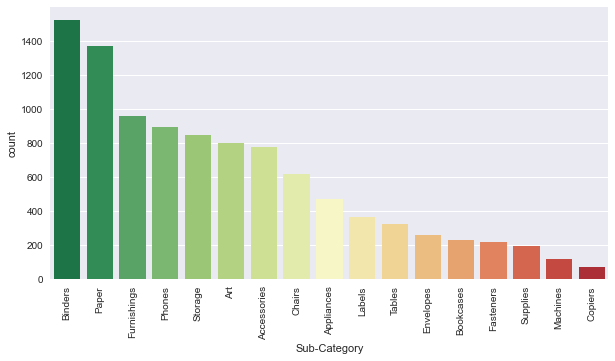

In [23]:

plt.figure(figsize=(10,5))
sns.countplot(x='Sub-Category',data=df,palette='RdYlGn_r',order=df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

## Conclusion
-  California is on top at both sales and profit.
-  Sales is highest in west.
-  Profit is highest in east.
-  Under category, technology has highest sales and profits
-  Under category, discount is more given to office supplies
-  Sales and Profit has a positive increment, if the discount is less.

Overall, the sales and profit ratio is huge, there is more wastageof resources as the company is actually not making the profit it should make inspite of all the maximum sales.
#### Solution:
Focus more on loss, less sales, less necessity in the regions, drawbacks of more discount, least preffered product. Because working on losses can bring the company to a sustained growth.